<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Импорты" data-toc-modified-id="Импорты-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорты</a></span></li><li><span><a href="#Открытие-и-изучение-файла" data-toc-modified-id="Открытие-и-изучение-файла-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Открытие и изучение файла</a></span></li><li><span><a href="#Предобработка-текста" data-toc-modified-id="Предобработка-текста-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Предобработка текста</a></span></li><li><span><a href="#Подготовка-к-обучению" data-toc-modified-id="Подготовка-к-обучению-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Подготовка к обучению</a></span><ul class="toc-item"><li><span><a href="#Дисбаланс-классов" data-toc-modified-id="Дисбаланс-классов-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Дисбаланс классов</a></span></li><li><span><a href="#Разделение-выборок" data-toc-modified-id="Разделение-выборок-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Разделение выборок</a></span></li><li><span><a href="#Подготовка-к-увеличению-выборки." data-toc-modified-id="Подготовка-к-увеличению-выборки.-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Подготовка к увеличению выборки.</a></span></li></ul></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#LGBM" data-toc-modified-id="LGBM-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>LGBM</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Анализ моделей</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#LGBM" data-toc-modified-id="LGBM-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>LGBM</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Наивная-моель" data-toc-modified-id="Наивная-моель-2.4.4"><span class="toc-item-num">2.4.4&nbsp;&nbsp;</span>Наивная моель</a></span></li></ul></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Изучим данные, представленные сервисом.

## Подготовка

### Импорты

In [16]:
# импортируем необходимые библиотеки 
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
nltk.download('wordnet') 
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn.dummy import DummyClassifier

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Открытие и изучение файла

In [17]:
# сохраним датасет и посмотрим всю информацию о нём 
df = pd.read_csv('/datasets/toxic_comments.csv') 

def info_df(df):  
    display(df.head()) #первые пять строк 
    display(df.info()) #общую информацию 
    display(df.isna().sum()) #пропуски 
    display(df.duplicated().sum()) #дубликаты 
                     
display(info_df(df)) 

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159571 non-null  object
 1   toxic   159571 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


None

text     0
toxic    0
dtype: int64

0

None

Датасет представлен достаточно большой, пропусков и дубликатов нет. Синтаксических и стилистических нарушений в наименовании столбцов нет. 

### Предобработка текста

Токенизируем, удалим стоп-слова и лемматизируем твиты.

In [18]:
corpus = df['text']

def tokenize(comment):
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    tokens = tokenizer.tokenize(comment)
    return tokens

df['tokens'] = corpus.apply(lambda x: tokenize(x.lower()))


stop_words = set(stopwords.words('english')) 

def remove_stop_words(tokens):
    filtered_comment = [w for w in tokens if not w in stop_words]
    return filtered_comment

df['wo_stopwords'] = df['tokens'].apply(lambda x: remove_stop_words(x))


def lemmatize(tokens):
    wnl = WordNetLemmatizer()
    lemmas = [wnl.lemmatize(word) for word in tokens]
    return lemmas

df['lemmas'] = df['wo_stopwords'].apply(lambda x: ' '.join(lemmatize(x)))
#то есть не работаем со списками и только потом к строке приводим (' '.join)

df.head()

,text,toxic,tokens,wo_stopwords,lemmas
0,Explanation\nWhy the edits made under my usern...,0,"[explanation, why, the, edits, made, under, my...","[explanation, edits, made, username, hardcore,...",explanation edits made username hardcore metal...
1,D'aww! He matches this background colour I'm s...,0,"[d, aww, he, matches, this, background, colour...","[aww, matches, background, colour, seemingly, ...",aww match background colour seemingly stuck th...
2,"Hey man, I'm really not trying to edit war. It...",0,"[hey, man, i, m, really, not, trying, to, edit...","[hey, man, really, trying, edit, war, guy, con...",hey man really trying edit war guy constantly ...
3,"""\nMore\nI can't make any real suggestions on ...",0,"[more, i, can, t, make, any, real, suggestions...","[make, real, suggestions, improvement, wondere...",make real suggestion improvement wondered sect...
4,"You, sir, are my hero. Any chance you remember...",0,"[you, sir, are, my, hero, any, chance, you, re...","[sir, hero, chance, remember, page]",sir hero chance remember page


Комментарии в датасете были разбиты на токены, очищены от стоп-слов и приведены к леммам.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   text          159571 non-null  object
 1   toxic         159571 non-null  int64 
 2   tokens        159571 non-null  object
 3   wo_stopwords  159571 non-null  object
 4   lemmas        159571 non-null  object
dtypes: int64(1), object(4)
memory usage: 6.1+ MB


### Подготовка к обучению

#### Дисбаланс классов

Теперь посмотрим на баланс классов, это наш целевой признак.

0    0.898321
1    0.101679
Name: toxic, dtype: float64


<AxesSubplot:>

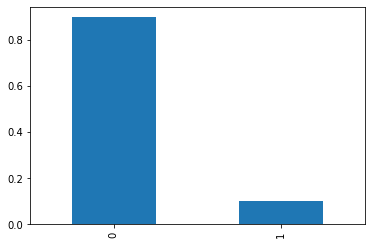

In [20]:
class_frequency = df['toxic'].value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')

Виден явный дисбаланс классов. Его будем устранять.

#### Разделение выборок

In [21]:
features = df['lemmas']
target = df['toxic']

features_train, features_test, target_train, target_test = train_test_split(
features, target, test_size=0.4, stratify=target, random_state=12345) # разделили выборки в пропорции 4 к 10

#посмотрим на размер новых даатасетов
def info_df(features_train, target_train, features_test, target_test): #на вход функция принимает все датасеты сразу
    df_all = [features_train, target_train, features_test, target_test]
    for i in df_all:
        print(i.shape)
                    
display(info_df(features_train, target_train, features_test, target_test))

(95742,)
(95742,)
(63829,)
(63829,)


None

#### Подготовка к увеличению выборки.

In [22]:
features_zeros = features_train[target_train == 0]  

features_ones = features_train[target_train == 1]  

target_zeros = target_train[target_train == 0]  

target_ones = target_train[target_train == 1]  

display(features_zeros.shape) 
display(features_ones.shape) 
display(target_zeros.shape) 
display(target_ones.shape) 

(86007,)

(9735,)

(86007,)

(9735,)

In [23]:
def upsample(features, target, repeat): 
    features_zeros = features[target == 0] 
    features_ones = features[target == 1] 

    target_zeros = target[target == 0] 
    target_ones = target[target == 1] 

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat) 
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat) 

    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345) 
    return features_upsampled, target_upsampled  

features_upsampled, target_upsampled = upsample(features_train, target_train, 10) 


display(features_upsampled.shape) 
display(target_upsampled.shape)

(183357,)

(183357,)

Поготовим данные для обучения. Приводить тексты к юникоду (.astype('U')) не будем, так как они все на английском.

In [24]:
count_tf_idf = TfidfVectorizer()

corpus_train = features_upsampled
corpus_test = features_test

tf_idf = count_tf_idf.fit_transform(corpus_train)

**Вывод**

В первом разделе провели первичный остмор файла, токенизацию, лематизацию текста, устранили дисбаланс классов и подггтовили данные к обучению.

## Обучение

### Логистическая регрессия

In [25]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=42, shuffle=True)

In [26]:
%time

lr = LogisticRegression(random_state=12345)
parameters = {'penalty':['l1', 'l2'],
              'C': [10,100],
              'solver':['lbfgs', 'liblinear'],
              'max_iter':[100,200]}

grid_naive_up = GridSearchCV(lr, param_grid=parameters, cv=kf, scoring='f1').fit(tf_idf,target_upsampled)
predictions_train = grid_naive_up.predict(tf_idf)

f1 = f1_score(target_upsampled, predictions_train)
display('f1 метрика на тренировочной выборке:', f1)
display('Наилучшие подобранные параметры', grid_naive_up.best_params_)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs


'f1 метрика на тренировочной выборке:'

0.9967969250480462

'Наилучшие подобранные параметры'

{'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

### LGBM

In [27]:
%time

lgbm = LGBMClassifier(random_state=12345)

lgbm_params = {'n_jobs': range(1, 4), 'learning_rate':[0.01, 0.04], 'num_iterations':[10, 100], 'num_leaves':[5, 31]}

grid_naive_up = GridSearchCV(lgbm, param_grid=lgbm_params, cv=kf, scoring='f1').fit(tf_idf,target_upsampled)
predictions_train = grid_naive_up.predict(tf_idf)

f1 = f1_score(target_upsampled, predictions_train)
display('f1 метрика на тренировочной выборке:', f1)
display('Наилучшие подобранные параметры', grid_naive_up.best_params_)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 9.78 µs


'f1 метрика на тренировочной выборке:'

0.8654816814371525

'Наилучшие подобранные параметры'

{'learning_rate': 0.04, 'n_jobs': 1, 'num_iterations': 100, 'num_leaves': 31}

### Случайный лес

In [28]:
%time

forest = RandomForestClassifier(random_state=12345) 

forest_params = {'n_estimators': [50, 100, 200],
                 'max_depth': [4, 6, 10, 12],
                 'random_state': [13]}

grid_naive_up = GridSearchCV(forest, param_grid=forest_params, cv=kf, scoring='f1').fit(tf_idf,target_upsampled)
predictions_train = grid_naive_up.predict(tf_idf)

f1 = f1_score(target_upsampled, predictions_train)
display('f1 метрика на тренировочной выборке:', f1)
display('Наилучшие подобранные параметры', grid_naive_up.best_params_)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


'f1 метрика на тренировочной выборке:'

0.7801706293479231

'Наилучшие подобранные параметры'

{'max_depth': 12, 'n_estimators': 200, 'random_state': 13}

На тренировочной выборке у LGBM самые лучшие показатели, как по времени, так и по метрике. Теперь посмотрим как модели покажут себя на тестовой выборке.

### Анализ моделей

In [29]:
tf_idf_test = count_tf_idf.transform(corpus_test)

#### Логистическая регрессия

In [30]:
%time

lr = LogisticRegression(random_state=12345, max_iter = 100, solver = 'lbfgs', C = 100, penalty = 'l2')
lr.fit(tf_idf,target_upsampled)
predictions_test = lr.predict(tf_idf_test)
f1 = f1_score(target_test, predictions_test)

print('f1 метрика логистической регрессии на тестовой выборке:', f1)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs
f1 метрика логистической регрессии на тестовой выборке: 0.7515584613045462


#### LGBM

In [31]:
%time

lgbm = LGBMClassifier(random_state=12345, n_jobs = 1, learning_rate = 0.04,  num_iterations = 100, num_leaves = 31)

lgbm.fit(tf_idf,target_upsampled)
predictions_test = lgbm.predict(tf_idf_test)
f1 = f1_score(target_test, predictions_test)

print('f1 метрика логистической регрессии на тестовой выборке:', f1)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs
f1 метрика логистической регрессии на тестовой выборке: 0.6879668049792532


#### Случайный лес

In [33]:
%time

forest = RandomForestClassifier(random_state=13, n_estimators = 200, max_depth = 12)

forest.fit(tf_idf,target_upsampled)
predictions_test = forest.predict(tf_idf_test)
f1 = f1_score(target_test, predictions_test)

print('f1 метрика логистической регрессии на тестовой выборке:', f1)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs
f1 метрика логистической регрессии на тестовой выборке: 0.2559900166389351


#### Наивная моель

In [34]:
%time

d = DummyClassifier()
d.fit(tf_idf,target_upsampled) # учим модель
d_predictions = d.predict(tf_idf_test) # предсказание 
f1 = f1_score(target_test, d_predictions)

display('f1 метрика логистической регрессии на тестовой выборке:', f1)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs


'f1 метрика логистической регрессии на тестовой выборке:'

0.184587380366615

## Выводы

In [35]:
#сделаем табличку, чтобы удобнее было делать выводы
index =['Логистическая регрессия', 
        'Случайный лес', 
        'LightGBM',
        'Наивная модель']

f1 = ['0.75',
        '0.25', 
        '0.68',
        '0.18'] 
 
Wall_time_ms = ['6.44',
                '6.2', 
                '5.01',
                '5.48'] 

list_tuples = list(zip(f1, Wall_time_ms)) 
 
dframe = pd.DataFrame(list_tuples, index = index, columns=['f1', 'Wall_time_ms']) 
 
display(dframe) 

,f1,Wall_time_ms
Логистическая регрессия,0.75,6.44
Случайный лес,0.25,6.2
LightGBM,0.68,5.01
Наивная модель,0.18,5.48


**Вывод**

По мере - самая лучшая модель - Логистическая регрессия. По вермени чуть лучше LGBM. Всё же лучше применять вработе - Логистическую регрессию, её время не так далеко ушло от LGBM, а метрика больше.